## Clustering With K Means - Python Tutorial

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\ML\Krish Naik Codes\Codebasics\datasets\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


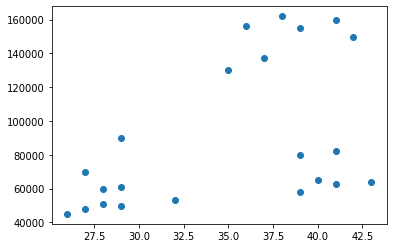

In [9]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km =KMeans(n_clusters=3)

In [6]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
km.fit_predict(df[['Age','Income($)']])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [11]:
y_pred =km.fit_predict(df[['Age','Income($)']])

In [12]:
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [13]:
df['cluster']= y_pred

In [14]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [23]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

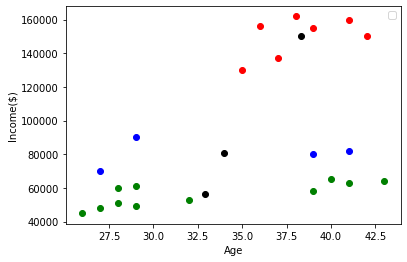

In [30]:
df0= df[df['cluster']==0]
df1= df[df['cluster']==1]
df2= df[df['cluster']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'] , color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [31]:
## Our scaling is not correct , x and y axis are not scaled properly

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [35]:
df[['Age','Income($)']] =minmax.fit_transform(df[['Age','Income($)']])

In [36]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [38]:
km =KMeans(n_clusters=3)

In [39]:
km.fit_predict(df[['Age','Income($)']])

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [40]:
y_pred =km.fit_predict(df[['Age','Income($)']])

In [41]:
df['new_cluster']= y_pred

In [42]:
df.head()

,Name,Age,Income($),cluster,new_cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,0


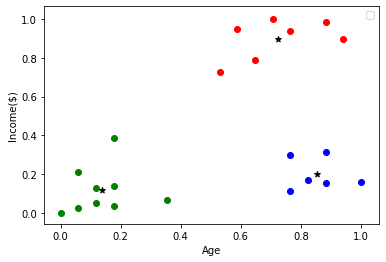

In [44]:
df0= df[df['new_cluster']==0]
df1= df[df['new_cluster']==1]
df2= df[df['new_cluster']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'] , color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black',marker='*')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

## See the difference between the 1st scatter plot and 2nd scatter plot as we had not scaled the features in the 1st one. Now the clusters are far better than the 1st figure

## Elbow plot

In [45]:
km.inertia_   ## Inertia means distance

0.4750783498553096

In [48]:
wcss =[]

for i in range(1,10):
    km =KMeans(n_clusters=i)
    km.fit_predict(df[['Age','Income($)']])
    wcss.append(km.inertia_)

In [49]:
wcss

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2871641949483683,
 0.22020960864009398,
 0.17541866346689933,
 0.13265419827245162,
 0.10995816883086575]

In [ ]:
## See the wcss values gradually decreasing

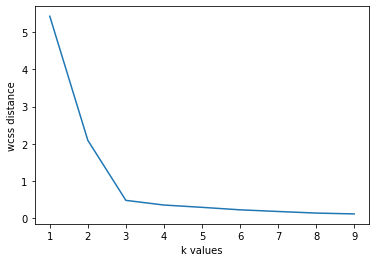

In [54]:
plt.plot(range(1,10), wcss)
plt.xlabel('k values')
plt.ylabel('wcss distance')
plt.show()